<a href="https://colab.research.google.com/github/tanmey007/Spark_Foundation/blob/master/Spark_Foundation_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries Imported

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Folder to store images

In [2]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

## Uploading dataset

In [3]:
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [4]:
iris=pd.read_csv('Iris.csv')

In [5]:
iris.set_index('Id',inplace=True)

## Visualisation

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


we have no missing values

In [7]:
iris.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

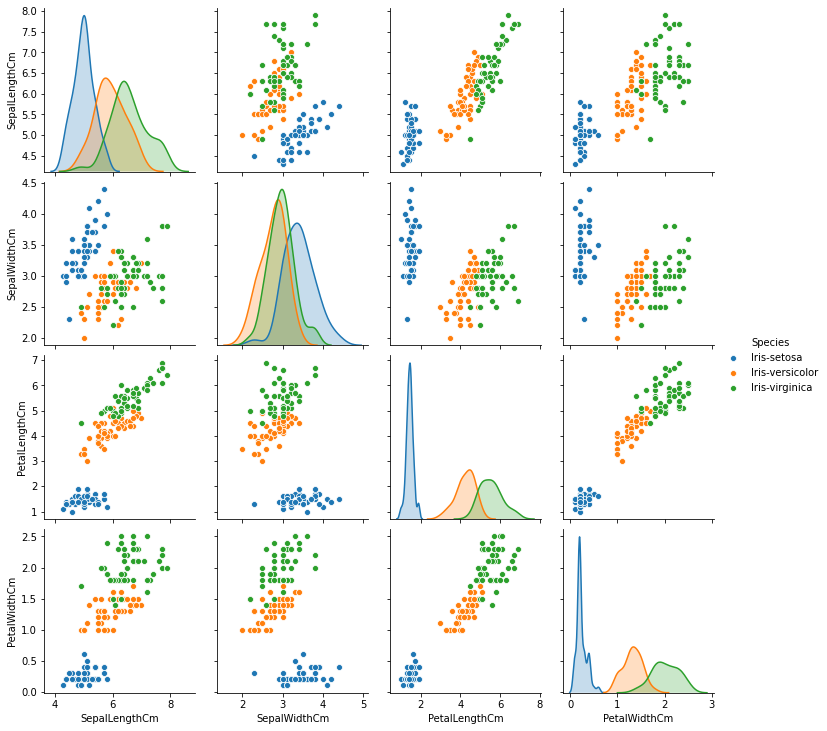

In [8]:
sns.pairplot(iris,hue='Species')

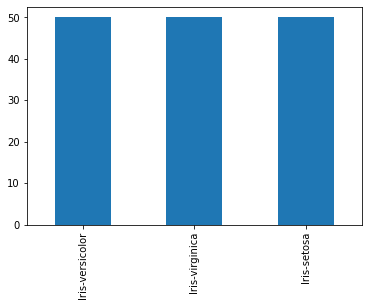

In [9]:
iris['Species'].value_counts().plot(kind='bar')

Population is equally distributed between three categories 

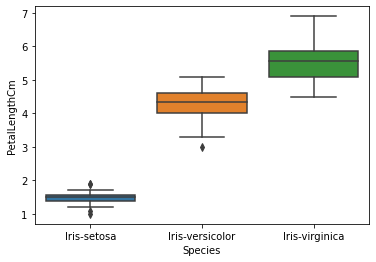

In [10]:
sns.boxplot(x='Species', y='PetalLengthCm',data=iris)

Setosa seems to have least petal length 

Virginica seems to have largest petal length

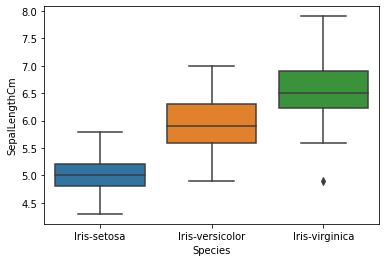

In [11]:
sns.boxplot(x='Species', y='SepalLengthCm',data=iris)

Setosa seems to have least Sepal length

Virginica seems to have largest Sepal length

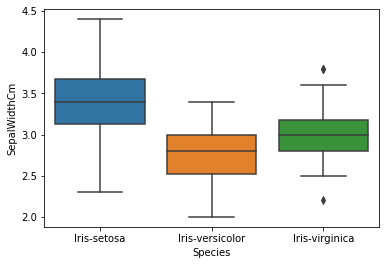

In [12]:
sns.boxplot(x='Species', y='SepalWidthCm',data=iris)

Setosa seems to have most spread in Sepal Width

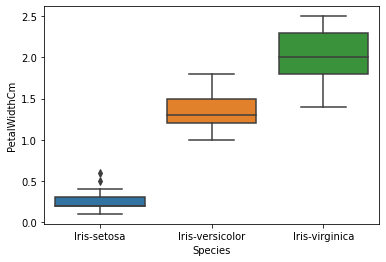

In [13]:
sns.boxplot(x='Species', y='PetalWidthCm',data=iris)

Setosa seems to have least petal width

Virginica seems to have largest petal width

## Spliting between training and test set

In [14]:
y=iris['Species']
iris=iris.drop('Species',axis=1)
iris_train,iris_test,y_train,y_test=train_test_split(iris,y,test_size=0.3,random_state=5)

We don't need to standardize data for decision tree as it does not depend upon distance between points so we can begin by training model

## Cross Validation

Run this block only once

In [15]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4,5,6],'max_depth':[ 2,3,4,5]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=5), params, verbose=1, cv=10,scoring='accuracy')
grid_search_cv.fit(iris_train, y_train)

Fitting 10 folds for each of 1960 candidates, totalling 19600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 19600 out of 19600 | elapsed:  1.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=5, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11

In [16]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

## Decision Tree

In [17]:
classifier=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')
classifier.fit(iris_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

## Visualizing the tree

In [18]:
export_graphviz(classifier,out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris_train.columns,class_names=["setosa","virginica","versicolor",],
        rounded=True,filled=True)

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [19]:
confusion_matrix(y_train, classifier.predict(iris_train))

array([[35,  0,  0],
       [ 0, 34,  0],
       [ 0,  3, 33]])

## Testing the model

In [20]:
y_pred=classifier.predict(iris_test)

In [21]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  2, 12]])

In [22]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [23]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.92      0.86      0.89        14

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



## Compiling the Results

In [24]:
model_prediction=pd.DataFrame(y_pred,index=iris_test.index,columns=['Model Prediction'])

In [25]:
Actual_output=pd.DataFrame(y_test,index=iris_test.index,columns=['Species'])

In [27]:
final_output=pd.concat([iris_test,Actual_output,model_prediction],axis=1)

In [28]:
final_output.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Model Prediction'],
      dtype='object')

In [29]:
final_output.to_csv('Decision_tree_iris.csv')
files.download('Decision_tree_iris.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>